In [1]:
!pip install lightkurve

     |████████████████████████████████| 245 kB 4.1 MB/s 
     |████████████████████████████████| 22.3 MB 34 kB/s 
     |████████████████████████████████| 4.4 MB 39.1 MB/s 
     |████████████████████████████████| 41 kB 167 kB/s 
     |████████████████████████████████| 98 kB 7.1 MB/s 
     |████████████████████████████████| 802 kB 42.0 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.2 MB 22.5 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=9669eb32ddd09d73bae0e853fccdf16ac09f5010e9ef75becc0a65814a6aa928
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=e23492d37e9fd662c8af0c1c0ce5b65366a4486125d62dd4c76f68a766ba090e
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for okto

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Light Curve

In [3]:
search_result = lk.search_lightcurve('WASP-33', mission='TESS')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 18,2019,SPOC,120,129979528,0.0
1,TESS Sector 18,2019,TESS-SPOC,1800,129979528,0.0
2,TESS Sector 18,2019,QLP,1800,129979528,0.0


In [4]:
search_result[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 18,2019,SPOC,120,129979528,0.0


In [5]:
for column in search_result.table.columns:
  print(column)

dataproduct_type
calib_level
obs_collection
obs_id
target_name
s_ra
s_dec
t_min
t_max
t_exptime
wavelength_region
filters
em_min
em_max
target_classification
obs_title
t_obs_release
instrument_name
proposal_pi
proposal_id
proposal_type
project
sequence_number
provenance_name
s_region
jpegURL
dataURL
dataRights
mtFlag
srcDen
intentType
obsid
objID
objID1
distance
exptime
obsID
obs_collection_products
dataproduct_type_products
description
type
dataURI
productType
productGroupDescription
productSubGroupDescription
productDocumentationURL
project_products
prvversion
proposal_id_products
productFilename
size
parent_obsid
dataRights_products
calib_level_products
author
mission
#
year
sort_order


In [6]:
# import numpy, which we will use to find the desired index in the table
import numpy as np
quarter2_index = np.where(search_result.table['mission'] == 'TESS')[0]
search_result[quarter2_index]

SearchResult containing 0 data products.

In [7]:
search_result_q2 = lk.search_lightcurve('WASP-33', mission='TESS', quarter=2)
search_result_q2

No data found for target "WASP-33".


SearchResult containing 0 data products.

In [8]:
lc = search_result.download()
lc

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1790.6619413258175,1.1595212e+05,3.9857983e+01,5.3082877e-03,405505,840.78865,1441.48421,1.1247804e+05,3.7518604e+01,3.0002026e+03,8.9794817e+00,1.1595212e+05,3.9857983e+01,0,nan,nan,nan,nan,840.78865,3.0317821e-04,1441.48421,2.8647776e-04,-6.8004496e-02,-8.1130780e-02
1790.6633302336775,1.1592225e+05,3.9864037e+01,5.3083072e-03,405506,840.79534,1441.46993,1.1248684e+05,3.7524303e+01,2.9959536e+03,8.9911451e+00,1.1592225e+05,3.9864037e+01,0,nan,nan,nan,nan,840.79534,3.0322428e-04,1441.46993,2.8698691e-04,-6.1256103e-02,-9.8540038e-02
1790.6647191415386,1.1603280e+05,3.9873791e+01,5.3083268e-03,405507,840.79426,1441.47860,1.1259015e+05,3.7533485e+01,3.0067415e+03,8.9643097e+00,1.1603280e+05,3.9873791e+01,0,nan,nan,nan,nan,840.79426,3.0288054e-04,1441.47860,2.8640270e-04,-6.2241338e-02,-8.7850273e-02
1790.666108049866,1.1599455e+05,3.9864208e+01,5.3083468e-03,405508,840.79270,1441.48384,1.1246293e+05,3.7524464e+01,3.0151792e+03,8.9940090e+00,1.1599455e+05,3.9864208e+01,0,nan,nan,nan,nan,840.79270,3.0304067e-04,1441.48384,2.8724479e-04,-6.3250341e-02,-8.2591563e-02
1790.6674969577268,1.1599179e+05,3.9860939e+01,5.3083664e-03,405509,840.79546,1441.46618,1.1250950e+05,3.7521389e+01,3.0058518e+03,8.9709730e+00,1.1599179e+05,3.9860939e+01,0,nan,nan,nan,nan,840.79546,3.0317693e-04,1441.46618,2.8699733e-04,-6.1086483e-02,-1.0403010e-01
1790.6688858655873,1.1591475e+05,3.9861332e+01,5.3083859e-03,405510,840.79087,1441.47988,1.1247745e+05,3.7521759e+01,3.0039724e+03,8.9735718e+00,1.1591475e+05,3.9861332e+01,0,nan,nan,nan,nan,840.79087,3.0331514e-04,1441.47988,2.8635401e-04,-6.5754421e-02,-8.6483635e-02
1790.6702747734473,1.1594251e+05,3.9860107e+01,5.3084055e-03,405511,840.78981,1441.47948,1.1251526e+05,3.7520607e+01,3.0117236e+03,8.9523849e+00,1.1594251e+05,3.9860107e+01,0,nan,nan,nan,nan,840.78981,3.0309777e-04,1441.47948,2.8643344e-04,-6.6925935e-02,-8.6572245e-02
1790.6716636813082,1.1595520e+05,3.9873070e+01,5.3084251e-03,405512,840.79189,1441.47540,1.1252455e+05,3.7532810e+01,2.9988379e+03,8.9970007e+00,1.1595520e+05,3.9873070e+01,0,nan,nan,nan,nan,840.79189,3.0304497e-04,1441.47540,2.8665797e-04,-6.3949764e-02,-9.2469670e-02


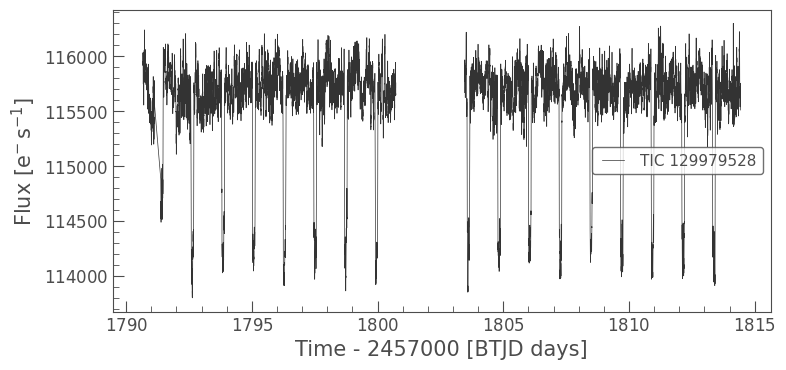

In [9]:
lc.plot();

In [10]:
lc_collection = search_result[:5].download_all()
lc_collection

LightCurveCollection of 3 objects:
    0: <TessLightCurve LABEL="TIC 129979528" SECTOR=18 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 129979528" SECTOR=18 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 129979528" SECTOR=18 AUTHOR=QLP FLUX_ORIGIN=sap_flux>

/usr/local/lib/python3.7/dist-packages/lightkurve/collections.py:266: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  LightkurveWarning,


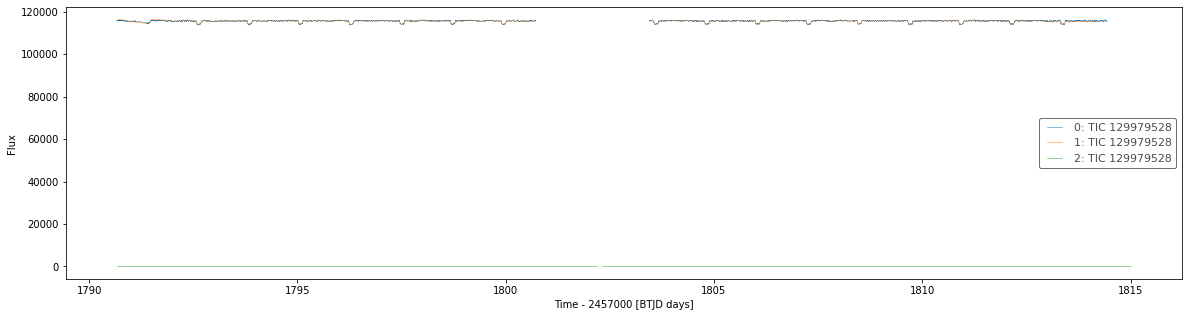

In [11]:
# Create a larger figure for clarity
fig, ax = plt.subplots(figsize=(20,5))
# Plot the light curve collection
lc_collection.plot(ax=ax);

/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1056: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning,


AttributeError: ignored

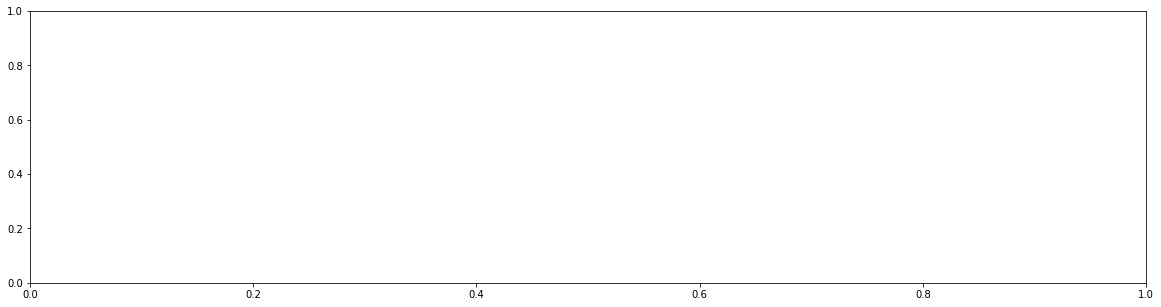

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
for lc in lc_collection:
  lc.normalize().plot(ax=ax, label=f'Quarter {lc.quarter}');

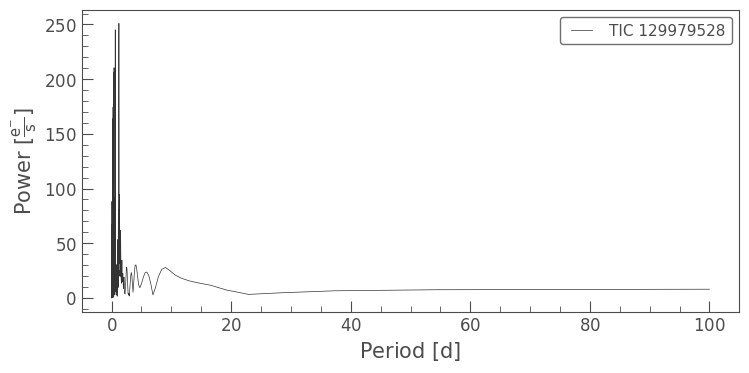

In [12]:
pg = lc.to_periodogram(maximum_period=100)
pg.plot(view='period');

In [13]:
pg.period_at_max_power

<Quantity 1.22319325 d>

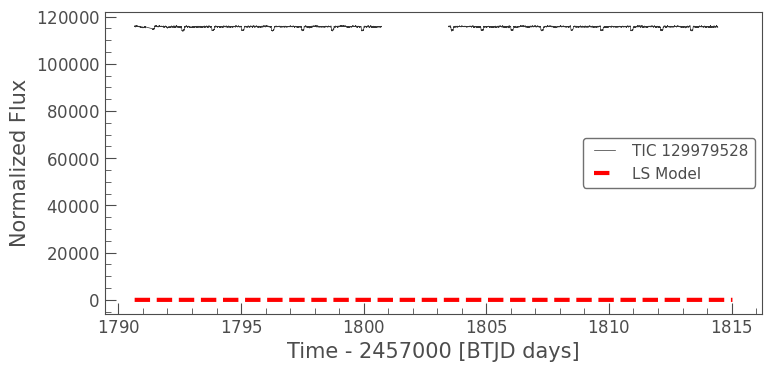

In [14]:
# Create a model light curve for the highest peak in the periodogram
lc_model = pg.model(time=lc.time, frequency=pg.frequency_at_max_power)
# Plot the light curve
ax = lc.plot()
# Plot the model light curve on top
lc_model.plot(ax=ax, lw=3, ls='--', c='red');

# 2. TPF

In [ ]:
search_result = lk.search_targetpixelfile('L98-59', exptime=1800)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 02,2018,TESS-SPOC,1800,307210830,0.0
1,TESS Sector 05,2018,TESS-SPOC,1800,307210830,0.0


In [ ]:
tpf = search_result.download()

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


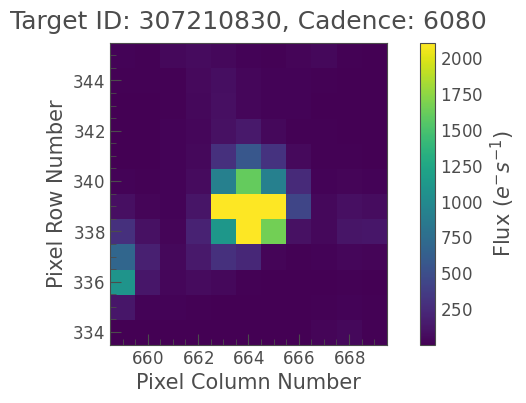

In [ ]:
tpf.plot();

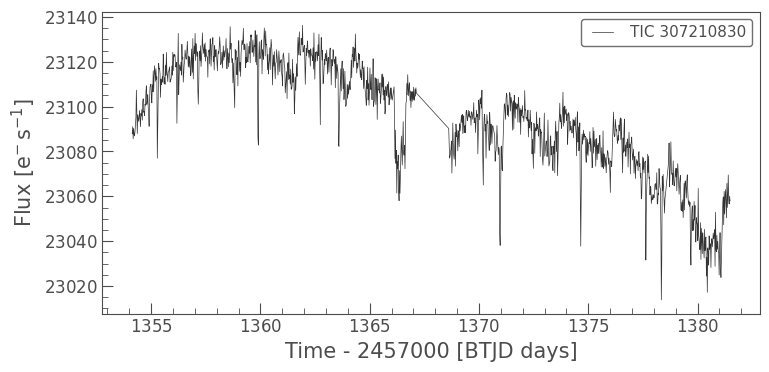

In [ ]:
lc = tpf.to_lightcurve()
lc.plot();

In [ ]:
tpf_collection = search_result.download_all()
tpf_collection

TargetPixelFileCollection of 2 objects:
    0: TessTargetPixelFile(TICID: 307210830)
    1: TessTargetPixelFile(TICID: 307210830)

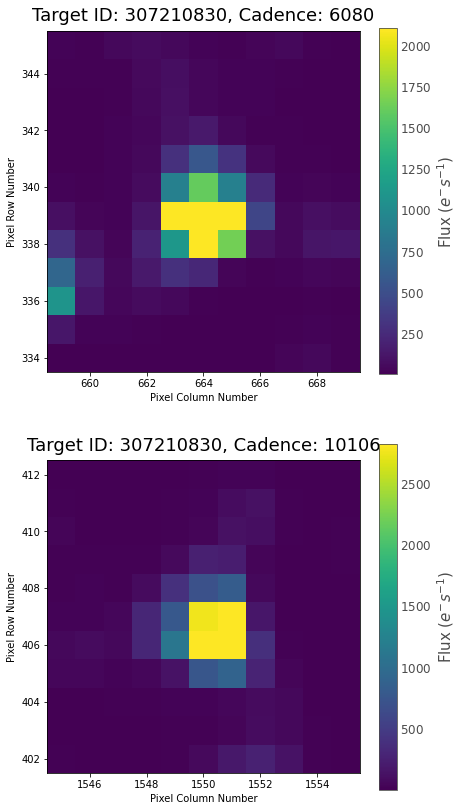

In [ ]:
tpf_collection.plot();